# Part III - Scaling prediction

In [ ]:

# Parameters
# R0 A1 A2 Ap Kv Kc Kp KD Av Ts pc lmax l

lyo=p0-pc-Av/Ap*Kv*R*(Ts-T-DT)/1833

Kv = Kc + (Kp * pc)/(1 + KD * pc)

sublimation_rate = Ap * (p0 - pc) / R

Workflow of fitting the product resistance by fitting to the product temperature transient using the quasi-steady one-dimensional LyoCalculator.

<img src="figures/flow_chart_partIII.png" width="300">

The equation for the pressure-dependent heat transfer coefficient of typical plastic bag was adopted from the literature [4] as given by

<img src="figures/PIIIeq1.png" width="300">


Product resistance analysis: 

<img src="figures/PIIIeq2.png" width="300">



In [1]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np


### Heat transfer coefficient

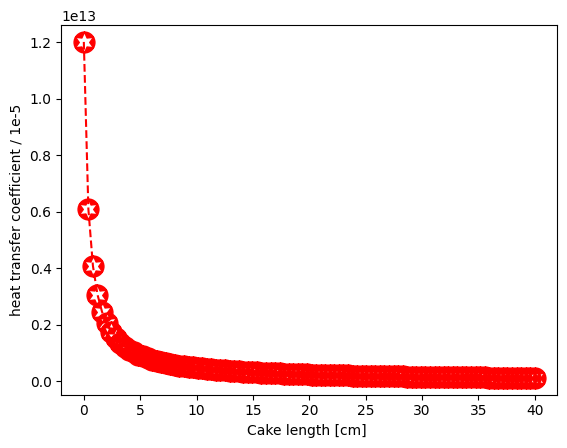

In [6]:

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

# Maximum cake length
lck_max = 0.4
n_steps = 100
lck_array = np.linspace(0, lck_max, n_steps)

# First approach

def Resistance (R0, A1, A2, lck):
    Rp = R0 + (A1 + lck)/(1 + A2 * lck)
    return Rp

plt.plot(lck_array*100, Resistance (2.7e04, 1.2e8, 2.4e2, lck_array)/1e-5, '--r', marker=cut_star, markersize=15, label='LabLyo1')

plt.xlabel('Cake length [cm] ')
plt.ylabel('heat transfer coefficient / 1e-5')
plt.show()

### Product Resistance